# Sampling
By sampling, a continuous signal is transformed to a discrete signal. The original signal is replaced by an (rescaled) impulse train. The value of the impulse at moment kT equals the value of f(kT). It's important to choose a good sampling speed. If the sampling speed is to fast, the signal is hardly changed and we have an overhead of samples. If the sampling speed is to slow, we cann't reconstruct the original signal.

## Signal
Choose a signal of the list, adjust the signal and press run.

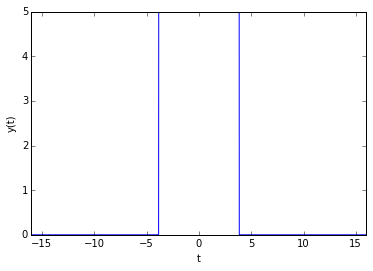

In [1]:
from sampling import *
%matplotlib inline
display(box)

## Fourier Transform
In this section we calculate the fourier transform of the signal. There might be small errors in the fourier transform due to numerical errors and the fact that you cann't represent a continue signal in a conputer. 

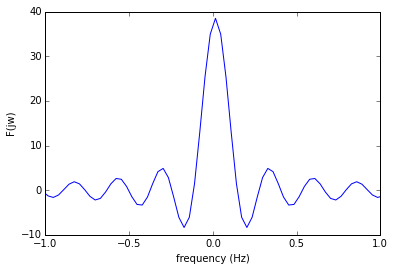

In [22]:
from sampling import y_signal,t_signal,left
if left:
    y_signalf = (1./Fs)* fourier.fftshift(fourier.fft(y_signal))
else:
    y_signalf = (1./Fs)* fourier.fftshift(fourier.fft(fourier.ifftshift(y_signal)))
t_signalf = np.linspace(-Fs/2.,Fs/2.,N)
draw_fourier_transform(t_signalf,y_signalf,True)

## Sampling speed
Choose the sampling speed of the signal. Make sure that the sampling frequention is bigger than two times the bandwidth.

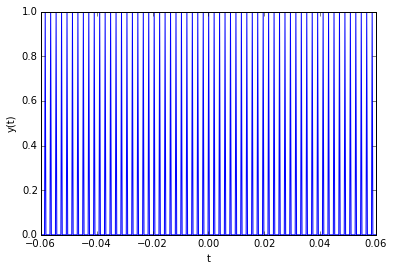

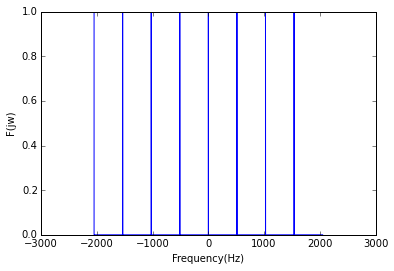

In [19]:
widgets.interact(sampling_dirac,f_s=(100.0,500.0,10.0))


## Sampling in discrete time
We now sample the original signal. We multiply the original signal and the impulse train. 

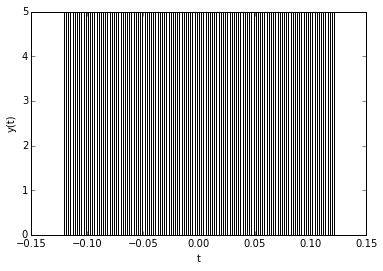

In [23]:
from sampling import y_signal,t_signal,y_dirac
dis_t = y_dirac * y_signal
draw_sampeled_signal(t_signal,dis_t)



## Sampling in fourier spectrum
The multiplication in the time spectrum becomes a convolution in the fourier spectrum. If the sampling speed was to slow overlap will occur. (This may take a while)

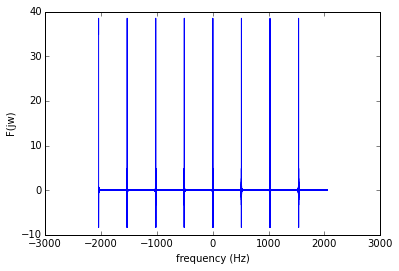

In [24]:
from sampling import y_diracf
samplef = np.convolve(y_signalf,y_diracf,'same')
ct = np.linspace(-Fs/(2.0), Fs/(2.),N)
draw_fourier_transform(ct,samplef)

## Reconstruction
Now we try to reconstruct the original signal using the calculated samples. (This may take a while)

[ -1.02310096e-16  -1.48878502e-05  -2.76132574e-05 ...,  -2.76132574e-05
  -1.48878502e-05  -1.02310096e-16]


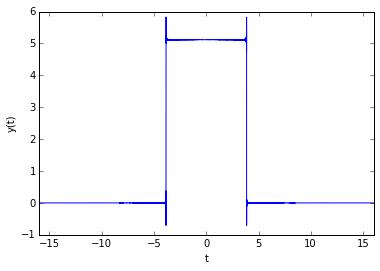

In [25]:
from sampling import t_signal,f_bem,xmin,xmax
w_0 = 2*np.pi*f_bem
reconstruct = np.sin(w_0*t_signal/2)/(w_0*t_signal/2)
print reconstruct
res = np.convolve(dis_t,reconstruct,'same')
res_ok = np.where(False == np.isnan(res))
plt.plot(t_signal,res)
plt.xlim(xmin,xmax)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()